# Sahil Sachin Donde - 19BCE1353 Web Mining Lab 10 - Decision Tree

### Q.1 Implement the algorithm and show the output for “play golf problem”. - Without in-built functions

In [133]:
import pandas as pd

In [134]:
golf_df = pd.read_excel("Golf.xlsx")
golf_df

,Outlook,Temperature,Humidity,Wind,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [135]:
tar_var = golf_df.columns[golf_df.shape[1]-1]
tar_var

'Play Golf'

In [136]:
main_dic = {}

In [137]:
golf_df.shape[0]
golf_df.iloc[0,1]

'Hot'

In [138]:
for i in range(golf_df.shape[1]):
    l = []
    df_uniq = list(golf_df.iloc[:,i].unique())
    df_list = golf_df.iloc[:,i].tolist()
    for j in df_uniq:
        d = {}
        d[j] = [df_list.count(j),round(df_list.count(j)/golf_df.shape[0],4)]
        l.append(d)
    main_dic[list(golf_df.columns)[i]] = l
for i in main_dic:
    print(i," -> ",main_dic[i])

Outlook  ->  [{'Rainy': [5, 0.3571]}, {'Overcast': [4, 0.2857]}, {'Sunny': [5, 0.3571]}]
Temperature  ->  [{'Hot': [4, 0.2857]}, {'Mild': [6, 0.4286]}, {'Cool': [4, 0.2857]}]
Humidity  ->  [{'High': [7, 0.5]}, {'Normal': [7, 0.5]}]
Wind  ->  [{False: [8, 0.5714]}, {True: [6, 0.4286]}]
Play Golf  ->  [{'No': [5, 0.3571]}, {'Yes': [9, 0.6429]}]


In [139]:
import math

In [140]:
def target_val(feature_name):
    l = []
    for i in main_dic[feature_name]:
        for j in i:
            l.append(j)
    return(l)
print(target_val("Play Golf"))

['No', 'Yes']


In [141]:
def Entropy(feature):
    #print(main_dic[feature])
    l = target_val(feature)
    #print(l)
    entropy_feature = 0
    for i in range(len(l)):
        a = main_dic[feature][i][l[i]][1]
        entropy_feature = round(entropy_feature + (-1)*(a)*(math.log(a,2)),4)
    return(entropy_feature)
print(Entropy("Play Golf"))

0.9402


In [148]:
print("Entropy(\"Play Golf\") : ",Entropy("Play Golf"),"\n")

print("Entropy(\"Outlook\") : ",Entropy("Outlook"),"\n")

print("Entropy(\"Temperature\") : ",Entropy("Temperature"),"\n")

print("Entropy(\"Humidity\") : ",Entropy("Humidity"),"\n")

print("Entropy(\"Wind\") : ",Entropy("Wind"))

Entropy("Play Golf") :  0.9402 

Entropy("Outlook") :  1.5774 

Entropy("Temperature") :  1.5567 

Entropy("Humidity") :  1.0 

Entropy("Wind") :  0.9853


In [142]:
def Entropy_val_x_Prob(value, feature):
    l = target_val(tar_var)
    tem = golf_df.loc[:,feature].tolist()
    #print(tem)
    tar = golf_df.loc[:,tar_var].tolist()
    #print(tar)
    dic = {}
    feature_uniq = list(golf_df.loc[:,feature].unique())
    for i in range(len(tem)):
        dic[tar[i]] = 0
    #print(dic)
    tot = 0
    for i in range(len(tem)):
        if(tem[i]==value):
            #print(tem[i],tar[i])
            dic[tar[i]] = dic[tar[i]] + 1
            tot = tot + 1
    #print(dic)
    #print(tot)
    entropy_prob = 0
    for i in dic:
        #print(i)
        a = dic[i]/tot
        if(a==0):
            return(0.0)
        entropy_prob = round(entropy_prob + (-1)*(a)*(math.log(a,2)),4)
    return(round(entropy_prob*(tot/golf_df.shape[0]),4))
print(Entropy_val_x_Prob('Sunny','Outlook'))

0.3468


In [167]:
print("Entropy(\"Sunny\",\"Outlook\") : ",Entropy_val_x_Prob('Sunny','Outlook'),"\n")

print("Entropy(\"Overcast\",\"Outlook\") : ",Entropy_val_x_Prob('Overcast','Outlook'),"\n")

print("Entropy(\"Rainy\",\"Outlook\") : ",Entropy_val_x_Prob('Rainy','Outlook'))

Entropy("Sunny","Outlook") :  0.3468 

Entropy("Overcast","Outlook") :  0.0 

Entropy("Rainy","Outlook") :  0.3468


In [168]:
print("Entropy(\"Hot\",\"Temperature\") : ",Entropy_val_x_Prob('Hot','Temperature'),"\n")

print("Entropy(\"Mild\",\"Temperature\") : ",Entropy_val_x_Prob('Mild','Temperature'),"\n")

print("Entropy(\"Cool\",\"Temperature\") : ",Entropy_val_x_Prob('Cool','Temperature'))

Entropy("Hot","Temperature") :  0.2857 

Entropy("Mild","Temperature") :  0.3936 

Entropy("Cool","Temperature") :  0.2318


In [169]:
print("Entropy(\"High\",\"Humidity\") : ",Entropy_val_x_Prob('High','Humidity'),"\n")

print("Entropy(\"Normal\",\"Humidity\") : ",Entropy_val_x_Prob('Normal','Humidity'))

Entropy("High","Humidity") :  0.4926 

Entropy("Normal","Humidity") :  0.2959


In [176]:
print("Entropy(\"False\",\"Wind\")",Entropy_val_x_Prob('False','Wind'),"\n")

print("Entropy(\"True\",\"Wind\")",Entropy_val_x_Prob('True','Wind'))

In [55]:
def Entropy_tar_feature(feature1, feature2):
    gain = 0
    feature_uniq = list(golf_df.loc[:,feature2].unique())
    #print(feature_uniq)
    for value in feature_uniq:
        gain = gain + Entropy_val_x_Prob(value, feature2)
    return(gain)
Entropy_tar_feature("Play Golf","Outlook")

0.6936

In [150]:
print("Entropy(\"Playgolf\",\"Outlook\") : ",Entropy_tar_feature("Play Golf","Outlook"),"\n")

print("Entropy(\"Playgolf\",\"Outlook\") : ",Entropy_tar_feature("Play Golf","Temperature"),"\n")

print("Entropy(\"Playgolf\",\"Outlook\") : ",Entropy_tar_feature("Play Golf","Humidity"),"\n")

print("Entropy(\"Playgolf\",\"Outlook\") : ",Entropy_tar_feature("Play Golf","Wind"))

Entropy("Playgolf","Outlook") :  0.6936 

Entropy("Playgolf","Outlook") :  0.9111 

Entropy("Playgolf","Outlook") :  0.7885 

Entropy("Playgolf","Outlook") :  0.8922


In [152]:
def Gain(feature1, feature2):
    return(round(Entropy(feature1)-Entropy_tar_feature(feature1, feature2),3))
Gain("Play Golf","Wind")

0.048

In [177]:
print("Gain(\"Playgolf\",\"Outlook\") : ",Gain("Play Golf","Outlook"),"\n")

print("Gain(\"Playgolf\",\"Temperature\") : ",Gain("Play Golf","Temperature"),"\n")

print("Gain(\"Playgolf\",\"Humidity\") : ",Gain("Play Golf","Humidity"),"\n")

print("Gain(\"Playgolf\",\"Wind\") : ",Gain("Play Golf","Wind"))

Gain("Playgolf","Outlook") :  0.247 

Gain("Playgolf","Temperature") :  0.029 

Gain("Playgolf","Humidity") :  0.152 

Gain("Playgolf","Wind") :  0.048


In [57]:
root_feature = 0
param = None
for i in range(golf_df.shape[1]-1):
    if(root_feature < Gain(tar_var, golf_df.columns[i])):
        root_feature = Gain(tar_var, golf_df.columns[i])
        param = golf_df.columns[i]
print(root_feature,param)

0.2466 Outlook


In [178]:
golf_df_Outlook_Sunny = golf_df[golf_df['Outlook']=='Sunny']
golf_df_Outlook_Rainy = golf_df[golf_df['Outlook']=='Rainy']
golf_df_Outlook_Overcast = golf_df[golf_df['Outlook']=='Overcast']

In [179]:
golf_df_Outlook_Sunny = golf_df_Outlook_Sunny.reset_index()
golf_df_Outlook_Sunny

,index,Outlook,Temperature,Humidity,Wind,Play Golf
0,3,Sunny,Mild,High,False,Yes
1,4,Sunny,Cool,Normal,False,Yes
2,5,Sunny,Cool,Normal,True,No
3,9,Sunny,Mild,Normal,False,Yes
4,13,Sunny,Mild,High,True,No


In [180]:
golf_df_Outlook_Overcast = golf_df_Outlook_Overcast.reset_index()
golf_df_Outlook_Overcast

,index,Outlook,Temperature,Humidity,Wind,Play Golf
0,2,Overcast,Hot,High,False,Yes
1,6,Overcast,Cool,Normal,True,Yes
2,11,Overcast,Mild,High,True,Yes
3,12,Overcast,Hot,Normal,False,Yes


In [181]:
golf_df_Outlook_Rainy = golf_df_Outlook_Rainy.reset_index()
golf_df_Outlook_Rainy

,index,Outlook,Temperature,Humidity,Wind,Play Golf
0,0,Rainy,Hot,High,False,No
1,1,Rainy,Hot,High,True,No
2,7,Rainy,Mild,High,False,No
3,8,Rainy,Cool,Normal,False,Yes
4,10,Rainy,Mild,Normal,True,Yes


### Q.1 Implement the algorithm and show the output for “play golf problem”. - With in-built functions

In [79]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [80]:
golf_df = pd.read_excel("Golf.xlsx")
golf_df

,Outlook,Temperature,Humidity,Wind,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [81]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
golf_df['Outlook']= label_encoder.fit_transform(golf_df['Outlook'])
golf_df['Temperature']= label_encoder.fit_transform(golf_df['Temperature'])
golf_df['Humidity']= label_encoder.fit_transform(golf_df['Humidity'])
golf_df['Wind']= label_encoder.fit_transform(golf_df['Wind'])
golf_df.iloc[:,0:4]
golf_df.iloc[:,4]

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play Golf, dtype: object

In [82]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(golf_df.iloc[:,0:4], golf_df.iloc[:,4], test_size=0.3, random_state=1) # 70% training and 30% test

In [83]:
(X_train)

,Outlook,Temperature,Humidity,Wind
4,2,0,1,0
1,1,1,0,1
12,0,1,1,0
0,1,1,0,0
13,2,2,0,1
9,2,2,1,0
8,1,0,1,0
11,0,2,0,1
5,2,0,1,1


In [84]:
y_train

4     Yes
1      No
12    Yes
0      No
13     No
9     Yes
8     Yes
11    Yes
5      No
Name: Play Golf, dtype: object

In [85]:
X_test

,Outlook,Temperature,Humidity,Wind
3,2,2,0,0
7,1,2,0,0
6,0,0,1,1
2,0,1,0,0
10,1,2,1,1


In [86]:
y_test

3     Yes
7      No
6     Yes
2     Yes
10    Yes
Name: Play Golf, dtype: object

In [87]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [88]:
y_pred

array(['No', 'No', 'No', 'Yes', 'No'], dtype=object)

In [89]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4


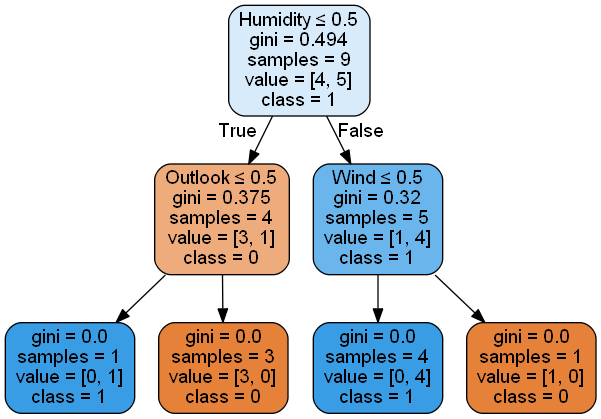

In [90]:
import graphviz
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = golf_df.columns[0:4],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### Q.2  Take a collection of documents. Classify using simple decision tree model. Draw your inferences.

In [131]:
# I took 9 documents to do this 2nd Question

In [2]:
import nltk

In [3]:
from nltk.tokenize import word_tokenize

In [4]:
from nltk.corpus import stopwords

In [5]:
nltk.download('stopwords')

nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()

In [9]:
dictionary_of_docs = {}
list_of_docs = []
for i in range(1,10):
    fn = "Documents/D"+str(i)+".txt"
    #print(fn)
    f = open(fn,'r')
    #print(f)
    for x in f:
        #print(x)
        #print(word_tokenize(x))
        tokens_without_sw = [word for word in word_tokenize(x) if not word in stopwords.words()]
        #print(tokens_without_sw)
        lemmas = [lemmatizer.lemmatize(lem) for lem in tokens_without_sw]
        #print(lemmas)
        #print("\n")
    dictionary_of_docs[i] = lemmas
    list_of_docs.append(lemmas)
#print(dictionary_of_docs)
for i in dictionary_of_docs:
    print("Doc-",i," -> ",dictionary_of_docs[i])

Doc- 1  ->  ['Electric', 'automotive', 'maker', 'Tesla', 'Inc.', 'likely', 'introduce', 'product', 'India', 'sometime', 'summer', '2017']
Doc- 2  ->  ['Automotive', 'major', 'Mahindra', 'likely', 'introduce', 'driverless', 'car']
Doc- 3  ->  ['BMW', 'plan', 'introduce', 'motorcycle', 'india']
Doc- 4  ->  ['Just', 'drive', ',', 'self-drive', 'car', 'rental', 'firm', 'us', 'smart', 'vehicle', 'technology', 'based', 'IoT']
Doc- 5  ->  ['Automotive', 'industry', 'going', 'hire', 'thousand', '2018']
Doc- 6  ->  ['Famous', 'cricket', 'player', 'Dhoni', 'brought', 'priced', 'car', 'Hummer', 'SUV']
Doc- 7  ->  ['Dhoni', 'led', 'india', 'second', 'world', 'cup', 'victory']
Doc- 8  ->  ['IoT', 'car', 'lead', 'safety', 'make', 'driverless', 'vehicle', 'revolution', 'possible']
Doc- 9  ->  ['Sachin', 'recommended', 'Dhoni', 'indian', 'skipper', 'post']


In [11]:
for i in list_of_docs:
    print(i)

['Electric', 'automotive', 'maker', 'Tesla', 'Inc.', 'likely', 'introduce', 'product', 'India', 'sometime', 'summer', '2017']
['Automotive', 'major', 'Mahindra', 'likely', 'introduce', 'driverless', 'car']
['BMW', 'plan', 'introduce', 'motorcycle', 'india']
['Just', 'drive', ',', 'self-drive', 'car', 'rental', 'firm', 'us', 'smart', 'vehicle', 'technology', 'based', 'IoT']
['Automotive', 'industry', 'going', 'hire', 'thousand', '2018']
['Famous', 'cricket', 'player', 'Dhoni', 'brought', 'priced', 'car', 'Hummer', 'SUV']
['Dhoni', 'led', 'india', 'second', 'world', 'cup', 'victory']
['IoT', 'car', 'lead', 'safety', 'make', 'driverless', 'vehicle', 'revolution', 'possible']
['Sachin', 'recommended', 'Dhoni', 'indian', 'skipper', 'post']


In [12]:
all_words = []
data = []
for i in (list_of_docs):
    all_words.extend(i)
    stn = ""
    for j in i:
        stn = stn + j + " "
    data.append(stn)
print(all_words)
print(len(all_words))
print(data)

['Electric', 'automotive', 'maker', 'Tesla', 'Inc.', 'likely', 'introduce', 'product', 'India', 'sometime', 'summer', '2017', 'Automotive', 'major', 'Mahindra', 'likely', 'introduce', 'driverless', 'car', 'BMW', 'plan', 'introduce', 'motorcycle', 'india', 'Just', 'drive', ',', 'self-drive', 'car', 'rental', 'firm', 'us', 'smart', 'vehicle', 'technology', 'based', 'IoT', 'Automotive', 'industry', 'going', 'hire', 'thousand', '2018', 'Famous', 'cricket', 'player', 'Dhoni', 'brought', 'priced', 'car', 'Hummer', 'SUV', 'Dhoni', 'led', 'india', 'second', 'world', 'cup', 'victory', 'IoT', 'car', 'lead', 'safety', 'make', 'driverless', 'vehicle', 'revolution', 'possible', 'Sachin', 'recommended', 'Dhoni', 'indian', 'skipper', 'post']
74
['Electric automotive maker Tesla Inc. likely introduce product India sometime summer 2017 ', 'Automotive major Mahindra likely introduce driverless car ', 'BMW plan introduce motorcycle india ', 'Just drive , self-drive car rental firm us smart vehicle techno

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vec = CountVectorizer()

In [15]:
matrix_X = vec.fit(data)

In [16]:
matrix_X

CountVectorizer()

In [91]:
# Printing the identified Unique words along with their indices
print("Vocabulary: ", vec.vocabulary_)
  
# Encode the Document
vector = vec.transform(data)

#print(vector)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

unique_words = []
for i in vec.vocabulary_:
    unique_words.append(i)

Vocabulary:  {'electric': 12, 'automotive': 2, 'maker': 31, 'tesla': 52, 'inc': 18, 'likely': 27, 'introduce': 22, 'product': 38, 'india': 19, 'sometime': 48, 'summer': 49, '2017': 0, 'major': 29, 'mahindra': 28, 'driverless': 11, 'car': 6, 'bmw': 4, 'plan': 33, 'motorcycle': 32, 'just': 24, 'drive': 10, 'self': 45, 'rental': 40, 'firm': 14, 'us': 54, 'smart': 47, 'vehicle': 55, 'technology': 51, 'based': 3, 'iot': 23, 'industry': 21, 'going': 15, 'hire': 16, 'thousand': 53, '2018': 1, 'famous': 13, 'cricket': 7, 'player': 34, 'dhoni': 9, 'brought': 5, 'priced': 37, 'hummer': 17, 'suv': 50, 'led': 26, 'second': 44, 'world': 57, 'cup': 8, 'victory': 56, 'lead': 25, 'safety': 43, 'make': 30, 'revolution': 41, 'possible': 35, 'sachin': 42, 'recommended': 39, 'indian': 20, 'skipper': 46, 'post': 36}
Encoded Document is:
[[1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0

In [92]:
vector_df = {}
for i in range(len(list_of_docs)):
    vector_df["Doc-"+str(i+1)] = vector.toarray()[i].tolist()
vector_df
vector_df = pd.DataFrame.from_dict(vector_df, orient ='index')

In [93]:
for i in range(len(unique_words)):
    vector_df.rename(columns = {i:unique_words[i]}, inplace = True)
vector_df

,electric,automotive,maker,tesla,inc,likely,introduce,product,india,sometime,...,lead,safety,make,revolution,possible,sachin,recommended,indian,skipper,post
Doc-1,1,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
Doc-2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc-3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc-4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
Doc-5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Doc-6,0,0,0,0,0,1,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Doc-7,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
Doc-8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Doc-9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [98]:
vector_df.columns

Index(['electric', 'automotive', 'maker', 'tesla', 'inc', 'likely',
       'introduce', 'product', 'india', 'sometime', 'summer', '2017', 'major',
       'mahindra', 'driverless', 'car', 'bmw', 'plan', 'motorcycle', 'just',
       'drive', 'self', 'rental', 'firm', 'us', 'smart', 'vehicle',
       'technology', 'based', 'iot', 'industry', 'going', 'hire', 'thousand',
       '2018', 'famous', 'cricket', 'player', 'dhoni', 'brought', 'priced',
       'hummer', 'suv', 'led', 'second', 'world', 'cup', 'victory', 'lead',
       'safety', 'make', 'revolution', 'possible', 'sachin', 'recommended',
       'indian', 'skipper', 'post'],
      dtype='object')

In [99]:
vector_df = vector_df[['electric', 'automotive', 'maker', 'tesla', 'inc', 'likely', 'product', 'india', 'sometime', 'summer', '2017', 'major',
       'mahindra', 'driverless', 'car', 'bmw', 'plan', 'motorcycle', 'just',
       'drive', 'self', 'rental', 'firm', 'us', 'smart', 'vehicle',
       'technology', 'based', 'iot', 'industry', 'going', 'hire', 'thousand',
       '2018', 'famous', 'cricket', 'player', 'dhoni', 'brought', 'priced',
       'hummer', 'suv', 'led', 'second', 'world', 'cup', 'victory', 'lead',
       'safety', 'make', 'revolution', 'possible', 'sachin', 'recommended',
       'indian', 'skipper', 'post',
       'introduce']]

In [100]:
vector_df

,electric,automotive,maker,tesla,inc,likely,product,india,sometime,summer,...,safety,make,revolution,possible,sachin,recommended,indian,skipper,post,introduce
Doc-1,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
Doc-2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Doc-3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc-4,0,0,0,1,0,0,0,0,0,2,...,0,0,1,0,0,1,1,0,0,1
Doc-5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Doc-6,0,0,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
Doc-7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,0
Doc-8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
Doc-9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
from sklearn import tree

In [120]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(vector_df.iloc[:,0:57], vector_df.iloc[:,57], test_size=0.35, random_state=1) # 70% training and 30% test

In [121]:
X_train

,electric,automotive,maker,tesla,inc,likely,product,india,sometime,summer,...,lead,safety,make,revolution,possible,sachin,recommended,indian,skipper,post
Doc-2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc-1,1,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
Doc-5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Doc-4,0,0,0,1,0,0,0,0,0,2,...,0,0,0,1,0,0,1,1,0,0
Doc-6,0,0,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [122]:
y_train

Doc-2    1
Doc-1    0
Doc-5    0
Doc-4    1
Doc-6    1
Name: introduce, dtype: int64

In [123]:
X_test

,electric,automotive,maker,tesla,inc,likely,product,india,sometime,summer,...,lead,safety,make,revolution,possible,sachin,recommended,indian,skipper,post
Doc-9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Doc-3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc-7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
Doc-8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [124]:
y_test

Doc-9    0
Doc-3    0
Doc-7    0
Doc-8    1
Name: introduce, dtype: int64

In [125]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [126]:
y_pred

array([1, 1, 1, 1], dtype=int64)

In [127]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.25


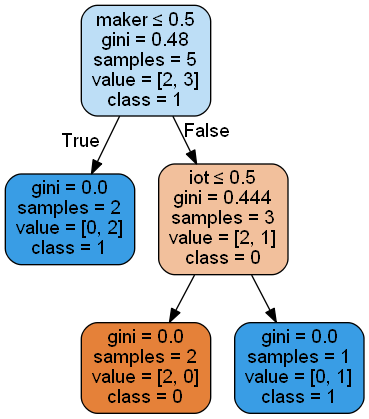

In [129]:
import graphviz
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = vector_df.columns[0:57],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())